In [2]:
# Loading libraries for the course
import random
import matplotlib.pyplot as plt             # Library used for plotting
from matplotlib.patches import Rectangle    # Module to plot a rectangle in the image
import urllib.request                       # Library to download data
import numpy as np                          # Library for array manipulation
import seaborn as sn                        # Library for advanced plotting
import pandas as pd                         # Library to manipulate data frames
import tifffile                             # Library to store numpy arrays as TIFF
import pathlib                              # Library to work with file paths
from pathlib import Path                    # Library to work with file paths
import skimage                              # Library for image manipulation. scikit-image
from skimage.io import imread               # Module from skimage
from matplotlib import animation            # Module to plot animations

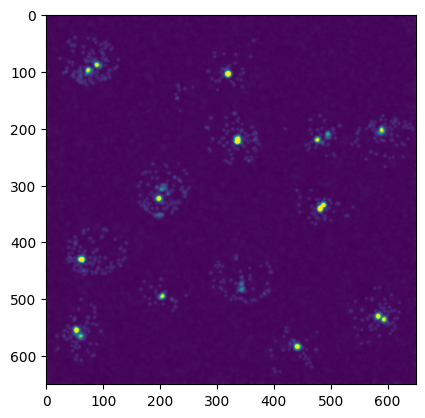

In [3]:
# Load the image
figName = '../Drug7_1000nM/rep1_FOV1.tif'
img = imread(str(figName))
type(img)
#use the first frame of the red channel
trans_site = np.max(img[:, :, :, 2], axis=0)
plt.imshow(trans_site)
plt.show()

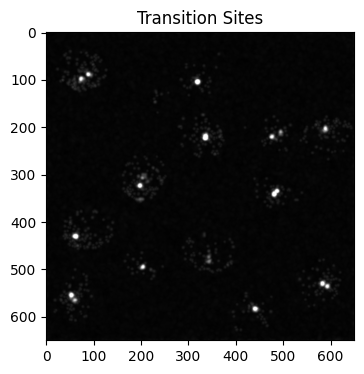

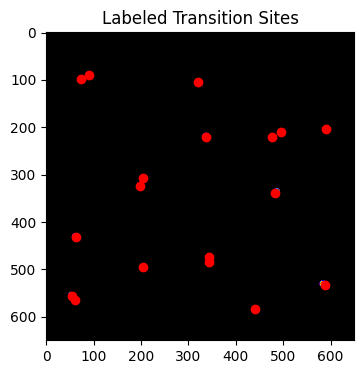

Number of transition sites: 18
Brightest spots of each site (y, x):
(88.74900084435689, 89.37866591612722)
(98.55617767823814, 73.92934463819122)
(104.5742459829251, 319.4270588673899)
(204.21314801663792, 589.1509079841737)
(210.86872862029645, 494.75570125427595)
(220.9889477627917, 336.12516056518945)
(220.43712426402232, 476.47902076231793)
(307.0969910371319, 203.20454545454547)
(323.59937962300165, 197.83526604628966)
(338.73880811172756, 483.5851827051846)
(430.6256207268802, 61.939222741993525)
(474.19803600654666, 343.00736497545006)
(483.3492668621701, 343.77536656891493)
(495.3170386767509, 203.7036217180102)
(532.8265056670864, 587.6783218510013)
(555.0304829454893, 53.11830570608862)
(565.1683673469388, 60.19188861985472)
(583.8090504839132, 441.2330630394978)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure, filters, io
from scipy import ndimage as ndi
# Display the original image
plt.figure(figsize=(4, 4))
plt.imshow(trans_site, cmap='gray')
plt.title('Transition Sites')
plt.show()

# Apply a threshold to segment the transition sites
threshold = filters.threshold_otsu(trans_site)
binary_img = trans_site > threshold

# Label connected components
labeled_img, num_labels = ndi.label(binary_img)

# Find the brightest spot in each labeled region
regions = measure.regionprops(labeled_img, intensity_image=trans_site)
brightest_spots = [region.weighted_centroid for region in regions]

# Display the labeled image and brightest spots
plt.figure(figsize=(4, 4))
plt.imshow(labeled_img, cmap='nipy_spectral')
plt.title('Labeled Transition Sites')

# Overlay the brightest spots
for spot in brightest_spots:
    plt.plot(spot[1], spot[0], 'ro')

plt.show()

print(f"Number of transition sites: {num_labels}")
print("Brightest spots of each site (y, x):")
for spot in brightest_spots:
    print(spot)